In [77]:
from model_utils import *

Conjunto de teste Original

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[{'box': [1067.4459228515625, 182.11459350585938, 1086.2806396484375, 231.0883331298828], 'color': 'green'}, {'box': [1016.4365234375, 186.0439453125, 1039.8472900390625, 236.3208465576172], 'color': 'off'}, {'box': [1024.513916015625, 261.418212890625, 1048.122314453125, 294.1034240722656], 'color': 'off'}, {'box': [1065.6510009765625, 259.4623107910156, 1094.6026611328125, 289.9574890136719], 'color': 'red'}, {'box': [1034.58642578125, 183.92808532714844, 1050.73828125, 237.243408203125], 'color': 'green'}]


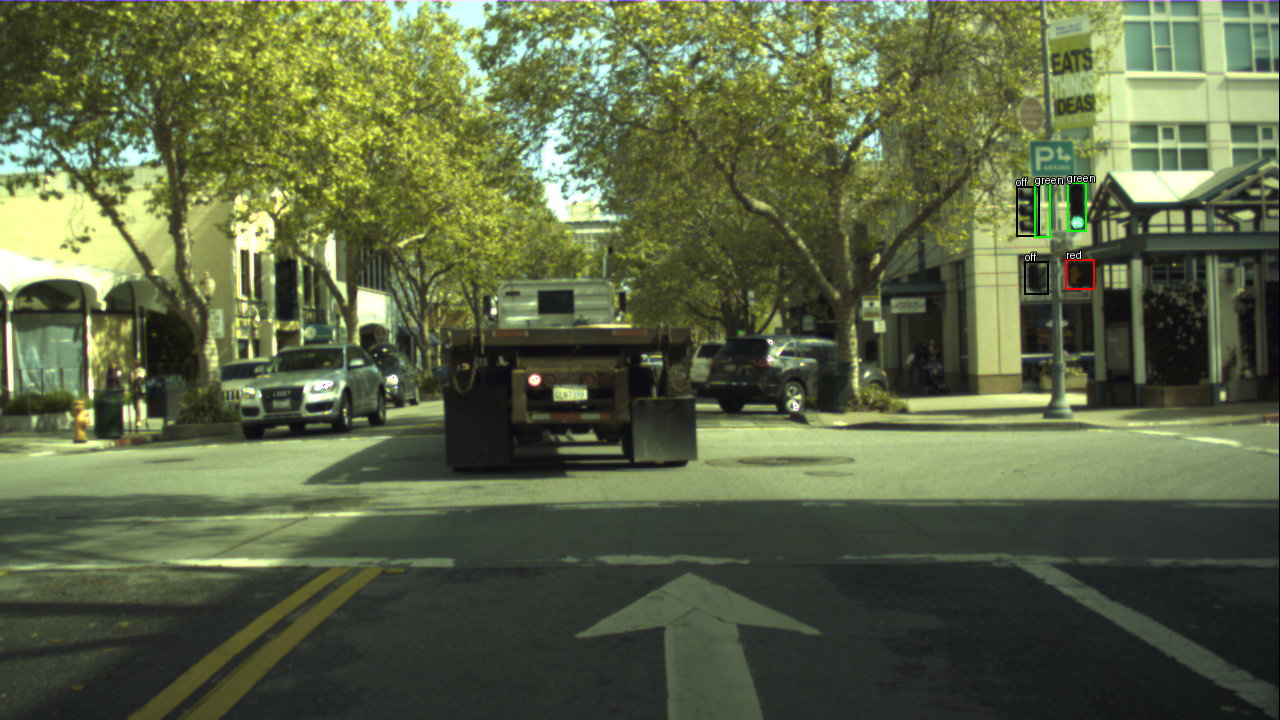

In [ ]:

out_img, dets = detect_and_classify("../new_dataset/test/rgb/test/25000.png")
print(dets)
out_img  # in Jupyter this will render the image

Imagem de João Pessoa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[{'box': [356.0500793457031, 108.54312896728516, 430.749755859375, 153.131591796875], 'color': 'red'}, {'box': [627.1809692382812, 277.6177673339844, 644.2671508789062, 321.5562438964844], 'color': 'red'}]


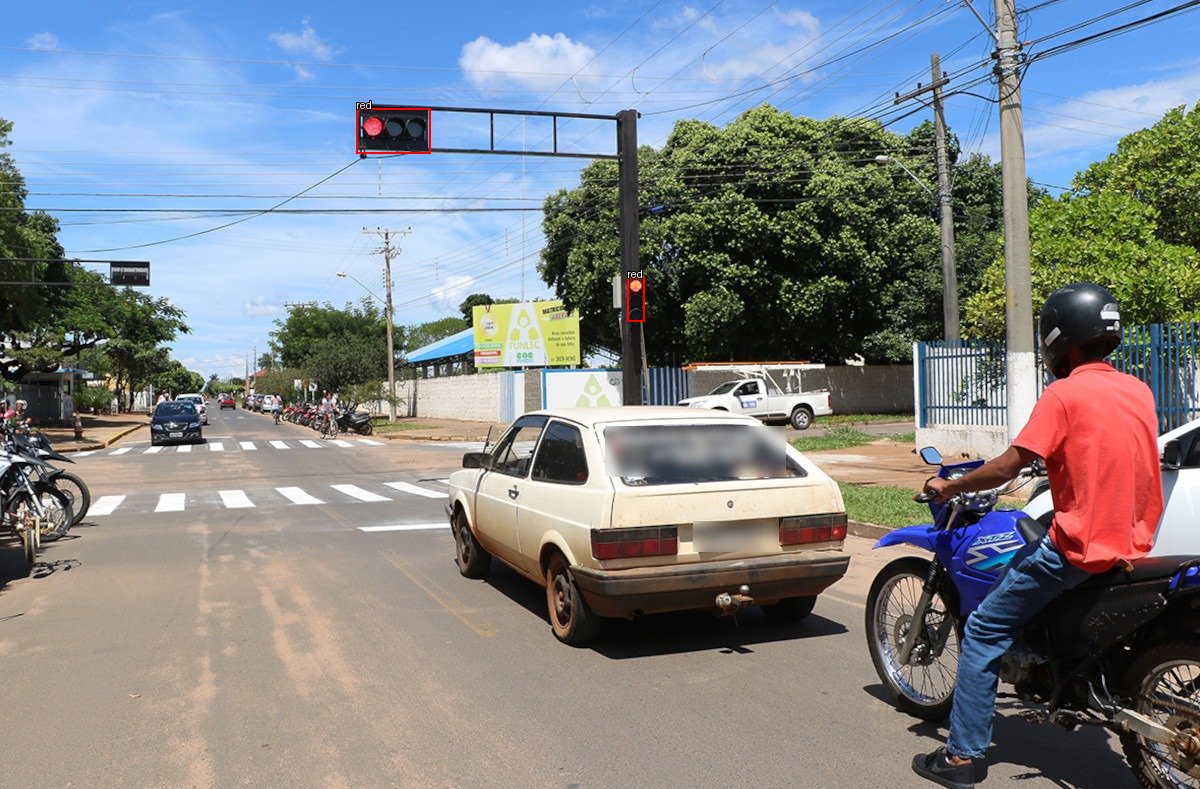

In [79]:
out_img, dets = detect_and_classify("../new_dataset/random-jp.jpeg")
print(dets)
out_img  # in Jupyter this will render the image

[]


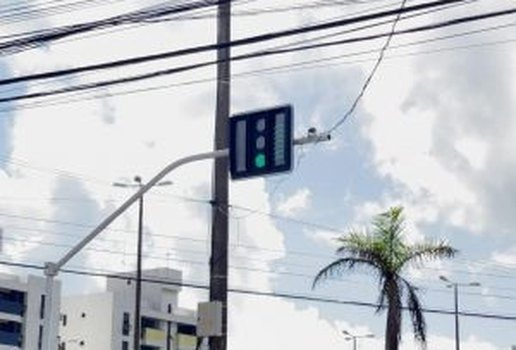

In [80]:
out_img, dets = detect_and_classify("../new_dataset/random-jp2.jpeg")
print(dets)
out_img  # in Jupyter this will render the image

In [81]:
test_img = Image.open("../new_dataset/random-jp2.jpeg").convert("RGB")

# box will crop 30% from above and 20% from the other parts to the center
box = np.array([0.3 * test_img.size[0], 0.2 * test_img.size[1], 0.7 * test_img.size[0], 0.8 * test_img.size[1]])

# classify color only
classify_color(test_img, box)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


'off'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[{'box': [75.67912292480469, 62.8425407409668, 91.0884017944336, 76.6156005859375], 'color': 'green'}, {'box': [162.91311645507812, 82.30437469482422, 169.1073760986328, 97.57276153564453], 'color': 'off'}]


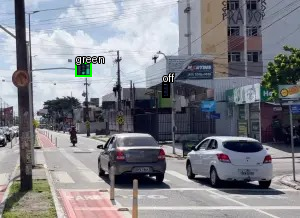

In [82]:
out_img, dets = detect_and_classify("../new_dataset/random-jp3.jpeg")
print(dets)
out_img  # in Jupyter this will render the image

Contra exemplo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


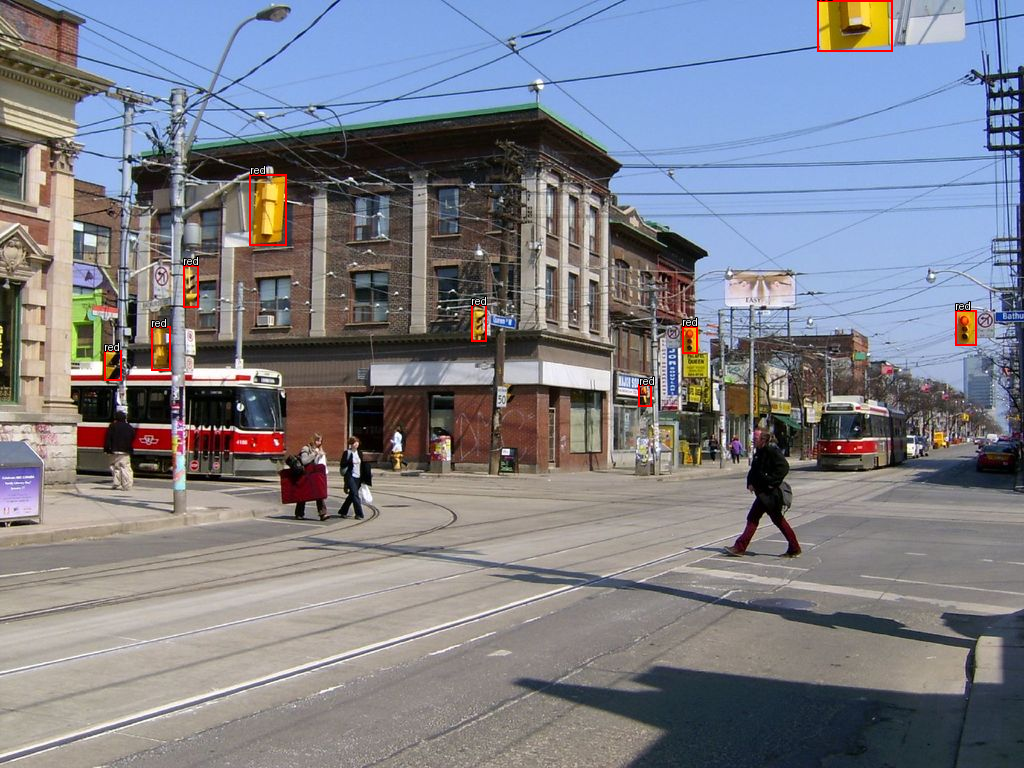

In [83]:
out_img, dets = detect_and_classify("../new_dataset/caos.jpg")
out_img

## Comparando resultados

In [1]:
import pandas as pd

df = pd.read_csv("../new_dataset/predictions.csv")
df.head()

path     x_min    y_min     x_max  \
0  ../new_dataset/test/rgb/test/33880.png  1143.750  192.875  1161.375   
1  ../new_dataset/test/rgb/test/33880.png   691.625  333.000   695.500   
2  ../new_dataset/test/rgb/test/33880.png   448.000  338.375   452.500   
3  ../new_dataset/test/rgb/test/39416.png  1081.250  161.750  1101.000   
4  ../new_dataset/test/rgb/test/39416.png   539.750  337.750   547.500   

     y_max  label     predicted  
0  245.875    Red           red  
1  345.125  Green  not_detected  
2  350.000  Green  not_detected  
3  214.875  Green         green  
4  352.250    Red           red

In [2]:
df['predicted'].value_counts()

predicted
not_detected    440
red             335
green           259
yellow           12
off               4
Name: count, dtype: int64

In [3]:
df['label'].value_counts()

label
Green     535
Red       475
off        28
Yellow     12
Name: count, dtype: int64

In [4]:
def map_color(color):
    if color == 'red':
        return 'Red'
    elif color == 'yellow':
        return 'Yellow'
    elif color == 'green':
        return 'Green'
    elif color == 'not_detected':
        return 'Not Detected'
    elif color == 'off':
        return 'Off'

In [5]:
df['predicted'] = df['predicted'].apply(map_color)

In [6]:
df['isEqual'] = df.apply(lambda x: x['label'] == x['predicted'], axis=1)
df['isEqual'].value_counts()

isEqual
True     606
False    444
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   path       1050 non-null   object 
 1   x_min      1050 non-null   float64
 2   y_min      1050 non-null   float64
 3   x_max      1050 non-null   float64
 4   y_max      1050 non-null   float64
 5   label      1050 non-null   object 
 6   predicted  1050 non-null   object 
 7   isEqual    1050 non-null   bool   
dtypes: bool(1), float64(4), object(3)
memory usage: 58.6+ KB


Total boxes: 1050
Detected boxes: 610 (58.1%)
Correct predictions: 606 (57.7%)


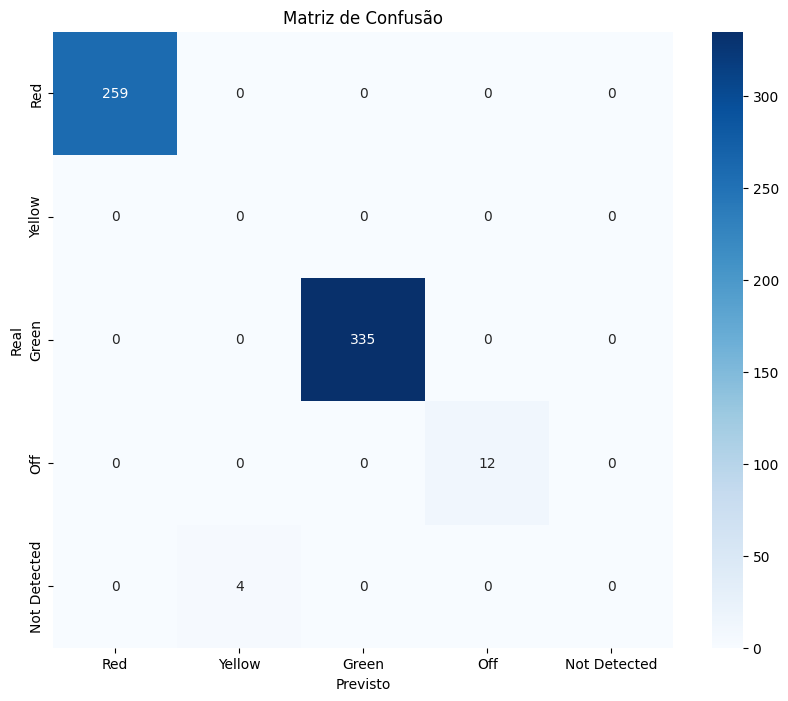

In [8]:
# Calcula e mostra algumas métricas
total = len(df)
detected = len(df[df['predicted'] != 'Not Detected'])
correct = len(df[df['label'] == df['predicted']])

print(f"Total boxes: {total}")
print(f"Detected boxes: {detected} ({detected/total*100:.1f}%)")
print(f"Correct predictions: {correct} ({correct/total*100:.1f}%)")

# Mostra matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Remove as não-detecções para a matriz de confusão
df_detected = df[df['predicted'] != 'Not Detected']
cm = confusion_matrix(df_detected['label'], df_detected['predicted'])

plt.figure(figsize=(10,8))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=['Red', 'Yellow', 'Green', 'Off', 'Not Detected'],
            yticklabels=['Red', 'Yellow', 'Green', 'Off', 'Not Detected'],)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [38]:
import yaml
import os
with open('../new_dataset/test/test.yaml', "r") as f:
    og_data = yaml.safe_load(f)

In [39]:
biggest_boxes_len = 0
biggest_item = None
for item in og_data:
    if len(item['boxes']) > biggest_boxes_len:
        biggest_boxes_len = len(item['boxes'])
        biggest_item = item 
print(biggest_boxes_len, biggest_item)

4 {'boxes': [{'label': 'Red', 'occluded': False, 'x_max': 1161.375, 'x_min': 1143.75, 'y_max': 245.875, 'y_min': 192.875}, {'label': 'Green', 'occluded': True, 'x_max': 695.5, 'x_min': 691.625, 'y_max': 345.125, 'y_min': 333.0}, {'label': 'Green', 'occluded': False, 'x_max': 452.5, 'x_min': 447.75, 'y_max': 348.875, 'y_min': 337.5}, {'label': 'Green', 'occluded': False, 'x_max': 452.5, 'x_min': 447.75, 'y_max': 348.875, 'y_min': 337.5}], 'path': 'test/33274.png'}


In [40]:
# append ../new_dataset/test/rgb/ to every item in new_data
for item in og_data:
    item['path'] = os.path.join("../new_dataset/test/rgb/", item['path'])


In [70]:
from model_utils import detect_and_classify
import matplotlib.pyplot as plt

def plot_detections(image_path: str, detections):
    from PIL import Image, ImageDraw
    import numpy as np
    img = Image.open(image_path).convert("RGB")
    
    draw = ImageDraw.Draw(img)
    for det in detections:
        box = np.array([det['x_min'], det['y_min'], det['x_max'], det['y_max']])
        color = det['label']
        # draw on image
        if color != "off":
            draw.rectangle(box.tolist(), outline=color if color != "green" else "lime", width=2)
        else:
            draw.rectangle(box.tolist(), outline="black", width=2)
        draw.text((box[0], box[1] - 10), color, fill="white", stroke_width=1, stroke_fill="black")
    return img


In [71]:
def compare_results(image_path, boxes):
    og_img = plot_detections(image_path, boxes)
    out_img, results = detect_and_classify(image_path, score_thresh=0.6)

    # plot each image below eachother
    fig, axs = plt.subplots(2, 1, figsize=(10, 20))
    axs[0].imshow(og_img)
    axs[0].set_title("Original Image with Boxes")
    axs[0].axis('off')
    axs[1].imshow(out_img)
    axs[1].set_title("Detected Image with Boxes")
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()

In [72]:
image_path = "../new_dataset/test/rgb/test/33274.png"
boxes = [item for item in og_data if item['path'] == image_path]
boxes = boxes[0]['boxes']
boxes

[{'label': 'Red',
  'occluded': False,
  'x_max': 1161.375,
  'x_min': 1143.75,
  'y_max': 245.875,
  'y_min': 192.875},
 {'label': 'Green',
  'occluded': True,
  'x_max': 695.5,
  'x_min': 691.625,
  'y_max': 345.125,
  'y_min': 333.0},
 {'label': 'Green',
  'occluded': False,
  'x_max': 452.5,
  'x_min': 447.75,
  'y_max': 348.875,
  'y_min': 337.5},
 {'label': 'Green',
  'occluded': False,
  'x_max': 452.5,
  'x_min': 447.75,
  'y_max': 348.875,
  'y_min': 337.5}]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


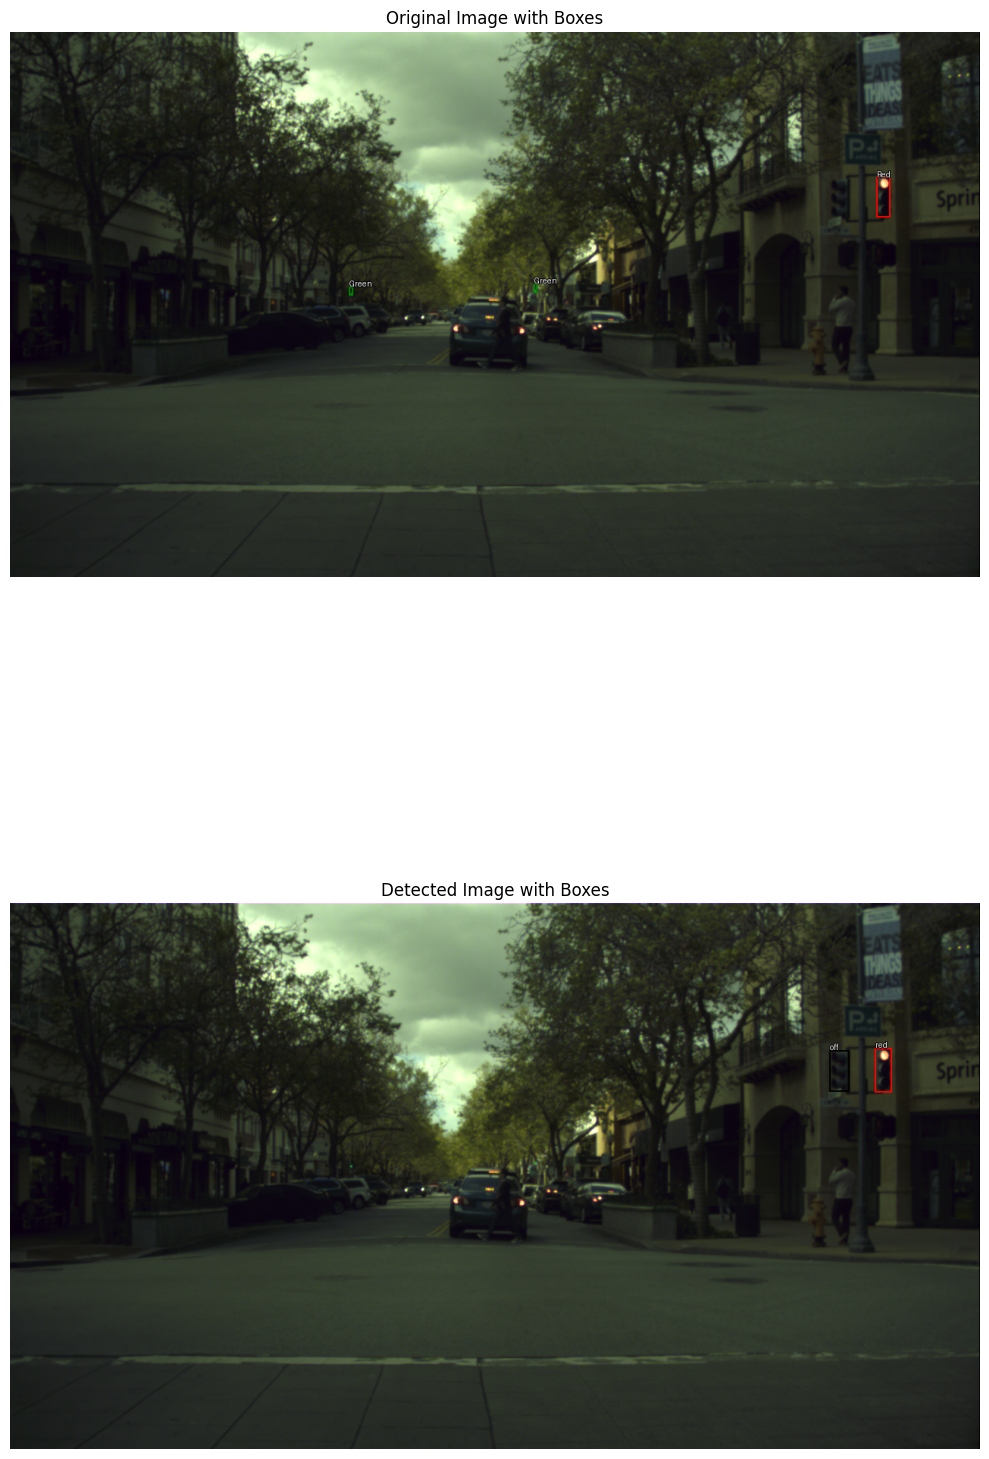

In [73]:
compare_results(image_path, boxes)